# Risk Attribution: Menchero Methodology ###

In [1]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from config import get_tickers
from factors_toolkit import FamaFrenchFactors
from portfolios_toolkit import markowitz_weights
from portfolios_toolkit import portfolio_variance

### Building a Portfolio ###

In [2]:
tickers = get_tickers("6.3")

tickers

['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

In [3]:
# Import the Returns Data
returns_df = pd.read_csv(r'..\additional_data\stocks_returns.csv')
returns_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
returns_df.set_index('Date', inplace=True)
returns_df.index = pd.to_datetime(returns_df.index)

returns_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.018915,-0.028576,-0.018998,0.000222,-0.004989,-0.018352,-0.035215,-0.000721,-0.014722,-0.010052,...,-0.013900,0.000000,-0.017166,-0.011416,-0.027743,-0.064259,-0.020527,0.036625,-0.014177,-0.006022
2015-01-06,-0.015700,0.000094,-0.004962,-0.011421,-0.020350,-0.023753,-0.019911,-0.008324,-0.019973,-0.011709,...,-0.017255,-0.001108,-0.021562,0.005306,-0.005330,-0.005898,-0.012351,-0.008513,-0.007231,-0.009804
2015-01-07,0.013184,0.013925,0.039621,0.008076,0.008190,0.010462,0.014920,0.008685,-0.002089,0.007747,...,0.016088,0.003045,0.028945,0.008598,0.010081,0.007857,0.032601,0.024566,0.025146,0.020432
2015-01-08,0.029534,0.037702,0.010404,0.020345,0.025135,0.017501,-0.014717,0.022681,0.024446,0.003522,...,0.019467,0.010722,0.011959,0.011532,0.016508,0.007517,0.017270,0.010561,0.021134,0.015282
2015-01-09,-0.007364,0.001072,-0.027736,-0.010563,-0.014922,-0.000731,-0.008566,-0.007188,-0.009054,-0.011270,...,-0.011519,-0.001368,0.012422,-0.012361,-0.001411,-0.019043,-0.001768,-0.014529,0.014508,0.001583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011083,0.011413,0.008985,0.003929,0.002683,0.014782,0.004355,0.007822,0.012494,0.013291,...,0.009663,0.006390,0.007575,0.007210,0.000940,0.005432,0.008480,0.004484,0.012187,0.002553
2024-12-26,-0.001986,0.003171,-0.004454,0.004434,0.004944,-0.000138,-0.000395,0.002594,-0.003159,-0.002203,...,0.001981,-0.003190,0.005952,-0.000440,0.000845,0.002705,0.007380,-0.000466,0.003559,0.004966
2024-12-27,-0.002137,-0.013331,-0.006663,-0.002432,-0.008208,-0.004919,-0.000593,-0.003539,-0.008999,-0.006305,...,-0.000630,-0.006410,-0.007079,-0.000587,-0.000094,-0.007966,-0.005678,-0.003549,-0.019799,-0.005574


In [4]:
# Make the portfolio DataFrame
portfolio_holdings_df = returns_df[tickers]
portfolio_holdings_df = portfolio_holdings_df

portfolio_holdings_df

,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2015-01-05,-0.028576,-0.020731,-0.021066,-0.016191,-0.009238,-0.017035,-0.042950
2015-01-06,0.000094,-0.023098,-0.023450,-0.013565,-0.014786,-0.030788,0.005648
2015-01-07,0.013925,0.010544,-0.001715,0.000000,0.012625,-0.002609,-0.001563
2015-01-08,0.037702,0.006813,0.003148,0.026309,0.028994,0.036927,-0.001566
2015-01-09,0.001072,-0.011818,-0.013035,-0.005644,-0.008441,0.004020,-0.018981
...,...,...,...,...,...,...,...
2024-12-24,0.011413,0.017573,0.008029,0.013084,0.009330,0.003930,0.070991
2024-12-26,0.003171,-0.008770,-0.002382,-0.007266,-0.002781,-0.002070,-0.017787
2024-12-27,-0.013331,-0.014641,-0.015647,-0.005884,-0.017453,-0.021088,-0.050745


In [5]:
# Portfolio's Returns and Variances
expected_returns = portfolio_holdings_df.mean()
covariance_matrix = portfolio_holdings_df.cov()

In [6]:
# Obtain Weights
p_weights = markowitz_weights(
    expected_returns, 
    covariance_matrix,
    0.0015
)

p_weights

array([ 0.25499297,  0.22918616,  0.02225282, -0.14335348,  0.22419189,
        0.39733883,  0.01539082])

In [7]:
# Create a Portfolio Weights DF
portfolio_weights = pd.Series(
    p_weights,
    index = portfolio_holdings_df.columns,
    name = 'weights'
)

portfolio_weights

AAPL    0.254993
AMZN    0.229186
GOOG    0.022253
META   -0.143353
MSFT    0.224192
NVDA    0.397339
TSLA    0.015391
Name: weights, dtype: float64

In [8]:
# Portfolios Variance
p_variance = portfolio_variance(p_weights, portfolio_holdings_df)

p_variance

0.00039338086147430447

In [9]:
# Portfolio Returns
portfolio_returns = portfolio_holdings_df @ p_weights
portfolio_returns.name = 'portfolio_returns'

In [10]:
# Holdings Standard Deviations
holdings_stds = portfolio_holdings_df.std()

holdings_stds

AAPL    0.017931
AMZN    0.020573
GOOG    0.017919
META    0.023847
MSFT    0.017091
NVDA    0.030376
TSLA    0.035910
dtype: float64

In [11]:
# Holding's correlations with the portfolio
corr_with_portfolio = portfolio_holdings_df.corrwith(portfolio_returns)

corr_with_portfolio

AAPL    0.761548
AMZN    0.731250
GOOG    0.680215
META    0.515698
MSFT    0.804129
NVDA    0.914610
TSLA    0.498156
dtype: float64

The reader can review the derivation of the x-sigma-rho methodology in Section 3 of this module’s PDF.

In [12]:
# Now get the x-sigma-rho
RC = portfolio_weights * holdings_stds * corr_with_portfolio
RC.name = 'risk_contribution'

RC

AAPL    0.003482
AMZN    0.003448
GOOG    0.000271
META   -0.001763
MSFT    0.003081
NVDA    0.011039
TSLA    0.000275
Name: risk_contribution, dtype: float64

In [13]:
RC.sum()

0.0198338312353994

In [14]:
np.sqrt(p_variance)

0.01983383123539939

In [14]:
# In percentage
RC_percent = (RC / np.sqrt(p_variance)) * 100

RC_percent

AAPL    17.556391
AMZN    17.384245
GOOG     1.367519
META    -8.888506
MSFT    15.534589
NVDA    55.657615
TSLA     1.388147
Name: risk_contribution, dtype: float64

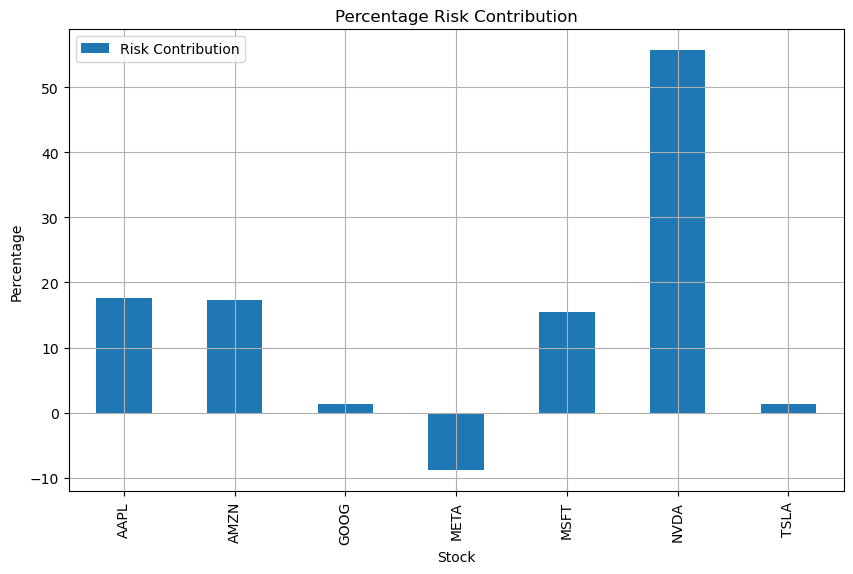

In [15]:
# Create Plot
plt.figure(figsize=(10, 6))
RC_percent.plot(kind='bar', label='Risk Contribution')

# Config
plt.title('Percentage Risk Contribution')
plt.xlabel('Stock')
plt.ylabel('Percentage')
plt.legend()
plt.grid()

# Show
plt.show() 

In [16]:
# Marginal Risk Contribution
MRC = holdings_stds * corr_with_portfolio
MRC.name = 'marginal_risk_contribution'

MRC

AAPL    0.013656
AMZN    0.015044
GOOG    0.012189
META    0.012298
MSFT    0.013743
NVDA    0.027782
TSLA    0.017889
Name: marginal_risk_contribution, dtype: float64

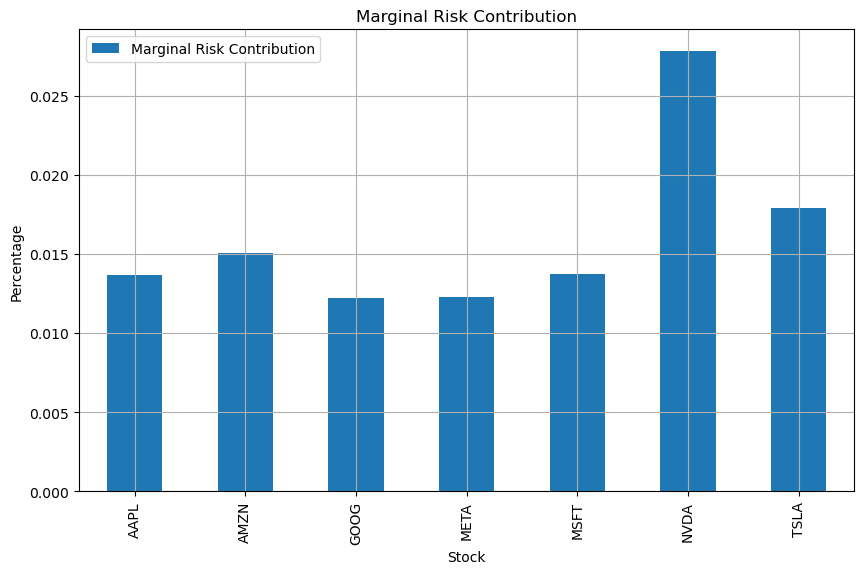

In [17]:
# Create Plot
plt.figure(figsize=(10, 6))
MRC.plot(kind='bar', label='Marginal Risk Contribution')

# Config
plt.title('Marginal Risk Contribution')
plt.xlabel('Stock')
plt.ylabel('Percentage')
plt.legend()
plt.grid()

# Show
plt.show() 

We conclude that our portfolio’s risk is more sensitive to NVDA’s exposure than to that of any other stock in the portfolio.

### Now Using Factor ###

In [15]:
# Now import the premiums
premiums_df = pd.read_csv(r'..\additional_data\famafrench_premiums.csv')
premiums_df.set_index('Date', inplace=True)
premiums_df.index = pd.to_datetime(premiums_df.index)
premiums_df.columns = ['mkt_premium', 'smb_premium', 'hml_premium', 'risk_free_rate']
premiums_df = premiums_df.div(100)

premiums_df

,mkt_premium,smb_premium,hml_premium,risk_free_rate
Date,,,,
2015-01-02,-0.0012,-0.0059,0.0012,0.00000
2015-01-05,-0.0184,0.0033,-0.0068,0.00000
2015-01-06,-0.0103,-0.0080,-0.0029,0.00000
2015-01-07,0.0119,0.0020,-0.0067,0.00000
2015-01-08,0.0181,-0.0012,-0.0029,0.00000
...,...,...,...,...
2025-03-25,0.0012,-0.0094,0.0005,0.00016
2025-03-26,-0.0122,-0.0048,0.0152,0.00016
2025-03-27,-0.0042,0.0019,0.0030,0.00016


In [16]:
# Now calculate the betas
portfolio_premium = portfolio_returns - premiums_df['risk_free_rate']

# Check if the Function Works
parameters = FamaFrenchFactors(
    portfolio_premium,
    premiums_df['mkt_premium'],
    premiums_df['smb_premium'],
    premiums_df['hml_premium'],
)

parameters

{'alpha': 0.0006334800418705186,
 'mkt_beta': 1.3830223570257059,
 'smb_beta': -0.2246430838662401,
 'hml_beta': -0.6727812501877852}

In [17]:
# Create the Parameters Series
portfolio_parameters = pd.DataFrame([parameters])
portfolio_parameters.columns = ['const', 'mkt_premium', 'smb_premium', 'hml_premium']
portfolio_parameters = portfolio_parameters.T
portfolio_parameters.columns = ['parameters']
portfolio_parameters = portfolio_parameters['parameters']
portfolio_parameters = portfolio_parameters.iloc[1:]

portfolio_parameters

mkt_premium    1.383022
smb_premium   -0.224643
hml_premium   -0.672781
Name: parameters, dtype: float64

In [18]:
# Get the standard deviations of the premiums
premiums_std = premiums_df[['mkt_premium', 'smb_premium', 'hml_premium']].std()
premiums_std.name = 'premium_std'

premiums_std

mkt_premium    0.011491
smb_premium    0.006552
hml_premium    0.009020
Name: premium_std, dtype: float64

In [19]:
# Holding's correlations with the portfolio
factors_corr_with_portfolio = premiums_df[['mkt_premium', 'smb_premium', 'hml_premium']].corrwith(portfolio_returns)

factors_corr_with_portfolio

mkt_premium    0.797406
smb_premium    0.105222
hml_premium   -0.356000
dtype: float64

In [20]:
# Now get the x-sigma-rho
RC = portfolio_parameters * premiums_std * factors_corr_with_portfolio
RC.name = 'risk_contribution'

RC

mkt_premium    0.012672
smb_premium   -0.000155
hml_premium    0.002160
Name: risk_contribution, dtype: float64

In [21]:
RC.sum()

0.014677694129744871

In [26]:
np.sqrt(portfolio_returns.var()) - RC.sum()

0.005156137105654506

In [ ]:
# Para calcular el riesgo idio:

# 1) Calcular los Retornos Idio (Retorno de las STOCKS - Xf) u = retorno especifico
# 2) A la serie de tiempo de u (std en rolling window) 126 - 252 días 
# 3) Con la misma ventana de tiempo y mismo half life se hace un covariance (matrix de covariance de factores)

In [24]:
# In percentage
RC_percent = (RC / np.sqrt(p_variance)) * 100

RC_percent

mkt_premium    63.892122
smb_premium    -0.780796
hml_premium    10.891996
Name: risk_contribution, dtype: float64

In [25]:
# Idiosyncratic Risk
idio_risk = 100 - RC_percent.sum()
idio_risk

25.996677315938115

### Correlation Drilldown ###

In Section 3 of the PDF, the correlation drilldown is explored in greater depth and with more mathematical rigor

In [21]:
# Calculate the Sigmas
sigmas = portfolio_holdings_df.std()

sigmas

AAPL    0.017931
AMZN    0.020573
GOOG    0.017919
META    0.023847
MSFT    0.017091
NVDA    0.030376
TSLA    0.035910
dtype: float64

In [22]:
# The Covariances
gammas = portfolio_holdings_df.cov()

gammas

,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
AAPL,0.000322,0.000205,0.000194,0.000224,0.000210,0.000298,0.000273
AMZN,0.000205,0.000423,0.000240,0.000290,0.000232,0.000324,0.000290
GOOG,0.000194,0.000240,0.000321,0.000267,0.000219,0.000290,0.000237
META,0.000224,0.000290,0.000267,0.000569,0.000237,0.000349,0.000276
MSFT,0.000210,0.000232,0.000219,0.000237,0.000292,0.000316,0.000250
NVDA,0.000298,0.000324,0.000290,0.000349,0.000316,0.000923,0.000446
TSLA,0.000273,0.000290,0.000237,0.000276,0.000250,0.000446,0.001290


In [29]:
# Portfolio Sigma
sigma_P = np.sqrt(p_variance)

sigma_P

0.01983383123539939

In [30]:
# The Correlations
rhos = portfolio_holdings_df.corr()

rhos

,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
AAPL,1.000000,0.556771,0.605188,0.524138,0.685132,0.546608,0.424624
AMZN,0.556771,1.000000,0.650858,0.590155,0.659565,0.518352,0.392554
GOOG,0.605188,0.650858,1.000000,0.623787,0.716064,0.533683,0.368848
META,0.524138,0.590155,0.623787,1.000000,0.581861,0.481468,0.322428
MSFT,0.685132,0.659565,0.716064,0.581861,1.000000,0.609252,0.406778
NVDA,0.546608,0.518352,0.533683,0.481468,0.609252,1.000000,0.408602
TSLA,0.424624,0.392554,0.368848,0.322428,0.406778,0.408602,1.000000


In [53]:
# Let us check the drilldowns
decomp = pd.DataFrame(index=portfolio_holdings_df.columns, columns=portfolio_holdings_df.columns)

# Loop
for m in portfolio_holdings_df.columns:  # Stock m (rows)
    for n in portfolio_holdings_df.columns:  # Stock n (columns)
        
        term = portfolio_weights.loc[n] * (sigmas.loc[n] / sigma_P) * rhos.loc[m, n]
        
        decomp.loc[m, n] = term

decomp

,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
AAPL,0.230536,0.132363,0.012167,-0.09034,0.132357,0.332633,0.011832
AMZN,0.128355,0.237733,0.013085,-0.101718,0.127418,0.315438,0.010939
GOOG,0.139517,0.154731,0.020104,-0.107515,0.138333,0.324767,0.010278
META,0.120832,0.140299,0.012541,-0.172359,0.112407,0.292992,0.008985
MSFT,0.157947,0.1568,0.014396,-0.100289,0.193185,0.370754,0.011335
NVDA,0.126013,0.12323,0.010729,-0.082985,0.117698,0.608539,0.011386
TSLA,0.097891,0.093323,0.007415,-0.055573,0.078583,0.24865,0.027866


In [55]:
# If we sum horizontally
rho_m_R = decomp.sum(axis=1)
rho_m_R.name = 'rho_m_R'

rho_m_R

AAPL    0.761548
AMZN     0.73125
GOOG    0.680215
META    0.515698
MSFT    0.804129
NVDA     0.91461
TSLA    0.498156
Name: rho_m_R, dtype: object

In [56]:
# Check that both ways to calculate the correlation with the portfolio are valid
corr_with_portfolio

AAPL    0.761548
AMZN    0.731250
GOOG    0.680215
META    0.515698
MSFT    0.804129
NVDA    0.914610
TSLA    0.498156
dtype: float64

In [58]:
# Now let us discount the self-interaction factor from the correlations:
rho_m_R_discounted = rho_m_R - decomp.values.diagonal()
rho_m_R_discounted.name = 'rho_m_R_discounted'

rho_m_R_discounted

AAPL    0.531013
AMZN    0.493517
GOOG    0.660111
META    0.688057
MSFT    0.610943
NVDA    0.306071
TSLA     0.47029
Name: rho_m_R_discounted, dtype: object